# <center>New York Airbnb Price Estimation</center>

<img src="Airbnb.png" style="height:350px" style="width:350px">

## Introduction to Airbnb:

Airbnb, Inc. is an online home sharing platform  offering lodging, primarily homestays, or tourism experiences.
It allows home owners and renters (hosts) to put their listings so that travellers can stay in them for payment.

## Project Objective/Problem Statement:

Airbnb pricing is very important factor in cities like New York where there is huge competition. We would like to address the following problems:
1. Explore data to find key insights/trends in airbnb rental price which can help hosts to maximize earnings & allow guests to find the perfect airbnb based on neighbourhood.
2. Leverage machine learning to predict the price for properties in New York.

## Initial Environment Setup:

The following packages have to be installed using pip install:
1. <b>folium</b>: pip install folium
2. pandas
3. numpy
4. matplotlib
5. sklearn
6. xgboost

In [1]:
# --------Print all the outputs in a cell--------
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Import Required Packages

In [2]:
import joblib
import warnings
warnings.filterwarnings('ignore')
import time
import numpy as np
import pandas as pd
from math import sqrt

# For Data Visualization & plotting
import seaborn as sns
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#For Preprocessing, Hyperparamater tuning in Machine Learning Models
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split

#For PCA:
from sklearn import decomposition
from sklearn.decomposition import PCA 
#For Linear Regression:
from sklearn.linear_model import LinearRegression
#For Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
#For Gradient Boosting:
from sklearn.ensemble import GradientBoostingRegressor
#For XG Boosting
import xgboost as xgb
from xgboost import plot_importance

#For evaluating Machine Learning Models
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import explained_variance_score, r2_score

## Import New York Airbnb Data

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')
print(f"The dataset contains {len(df)} Airbnb listings")

The dataset contains 48895 Airbnb listings


In [4]:
df.shape

(48895, 16)

## Dataset Description

The dataset used for this project comes from kaggle.com.This dataset describes the listing activity
and metrics in NYC, NY for 2019. This data file includes all data abouts hosts and  geographical availability

Dataset contains the following columns:

* id - unique id of the listing
* name -listing id description
* host_id - unique id of the listing owner
* host_name - name of the listing owner
* neighbourhood_group - neighbourhood group of the listing
* neighbourhood - neighbourhood/area of the listing
* latitude/longitude - lat & lon of the listing
* room_type - type of listing, e.g. entire home, private room or shared room
* price - nightly advertised price (the target variable)
* calculated_host_listings_count - the number of listing provided by each host
* minimum_nights - the minimum length of stay
* availability_365 - how many nights are available to be booked in the next 365 days
* number_of_reviews - the number of reviews left for the property
* reviews_per_month - calculated field of the average number of reviews left by guest each month

## Check head & tail of dataframe

In [6]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [7]:
df.tail(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


## Check datatypes of columns

In [8]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Check information about each column

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

# Data Cleaning

## 1. Check for duplicates in data

In [10]:
df.duplicated().sum()

0

## 2. Check for NaN value count in each column

In [11]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## 3. Drop unnecessary columns & Rename columns

In [12]:
df.drop(['name','id','host_name','last_review','host_id'],axis=1,inplace=True)

In [13]:
df = df.rename(columns={'reviews_per_month':'avg_reviews_per_month'})

In [14]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,avg_reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## 4. Replace NaN in reviews_per_month in the following way:
1. Identify different neighbourhood groups
2. Calculate mean value for reviews per month for Airbnbs by each neighbourhood - Bronx, Brooklyn, Manhattan, Queens & Staten Island
3. Locate rows in each of these neighbourhood groups with Airbnb reviews_per_month = NaN & replace by above calculated mean

In [15]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [16]:
Bronx_last_reviews_permonth_mean = df[df['neighbourhood_group'] 
                                      == 'Bronx'][['avg_reviews_per_month']].max(axis = 1).mean()

Brooklyn_last_reviews_permonth_mean = df[df['neighbourhood_group'] 
                                         == 'Brooklyn'][['avg_reviews_per_month']].max(axis = 1).mean()

Manhattan_last_reviews_permonth_mean = df[df['neighbourhood_group'] 
                                          == 'Manhattan'][['avg_reviews_per_month']].max(axis = 1).mean()

Queens_last_reviews_permonth_mean = df[df['neighbourhood_group'] 
                                       == 'Queens'][['avg_reviews_per_month']].max(axis = 1).mean()

Staten_last_reviews_permonth_mean = df[df['neighbourhood_group'] 
                                       == 'Staten Island'][['avg_reviews_per_month']].max(axis = 1).mean()

In [17]:
print('Mean of reviews per month for Airbnbs in Bronx:', Bronx_last_reviews_permonth_mean)
print('Mean of reviews per month for Airbnbs in Brooklyn:', Brooklyn_last_reviews_permonth_mean)
print('Mean of reviews per month for Airbnbs in Manhattan:', Manhattan_last_reviews_permonth_mean)
print('Mean of reviews per month for Airbnbs in Queens:', Queens_last_reviews_permonth_mean)
print('Mean of reviews per month for Airbnbs in Staten Island:', Staten_last_reviews_permonth_mean)

Mean of reviews per month for Airbnbs in Bronx: 1.8378310502283113
Mean of reviews per month for Airbnbs in Brooklyn: 1.2832115279382221
Mean of reviews per month for Airbnbs in Manhattan: 1.2721308321308262
Mean of reviews per month for Airbnbs in Queens: 1.9412002623524234
Mean of reviews per month for Airbnbs in Staten Island: 1.8725796178343956


In [18]:
df.loc[((df.neighbourhood_group == 'Bronx') & (df.avg_reviews_per_month.isnull())),
       'avg_reviews_per_month'] = Bronx_last_reviews_permonth_mean

df.loc[((df.neighbourhood_group == 'Brooklyn') & (df.avg_reviews_per_month.isnull())),
       'avg_reviews_per_month'] = Brooklyn_last_reviews_permonth_mean

df.loc[((df.neighbourhood_group == 'Manhattan') & (df.avg_reviews_per_month.isnull())),
       'avg_reviews_per_month'] = Manhattan_last_reviews_permonth_mean

df.loc[((df.neighbourhood_group == 'Queens') & (df.avg_reviews_per_month.isnull())),
       'avg_reviews_per_month'] = Queens_last_reviews_permonth_mean

df.loc[((df.neighbourhood_group == 'Staten Island') & (df.avg_reviews_per_month.isnull())),
       'avg_reviews_per_month'] = Staten_last_reviews_permonth_mean

## 5. Check unique values for neighbourhood group

In [19]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

## 6. Check unique values in neighbourhood column

In [20]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [21]:
len(df.neighbourhood.unique())

221

## 7. Check unique values in Room Type column

In [22]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## 8. Check for NaN values in dataframe

In [23]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
avg_reviews_per_month             0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## 9. Check data

In [24]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,avg_reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.272131,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


## Exploratory Data Analysis

 ### 1. Relationship between Price & Neighbourhood Group

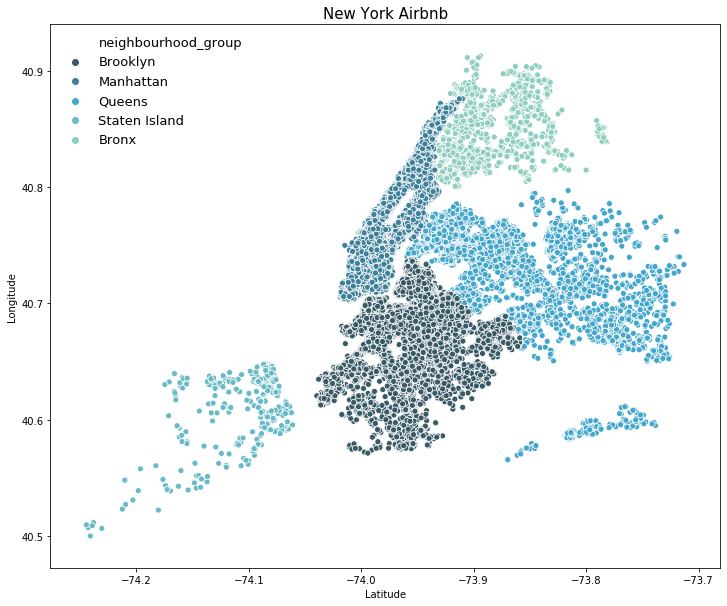

In [25]:
plt.figure(figsize=(12,10))
a = sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='GnBu_d');
plt.title('New York Airbnb', fontsize=15);
plt.xlabel('Latitude');
plt.ylabel("Longitude");
plt.legend(frameon=False, fontsize=13);

In [26]:
df_grp = df.groupby(by=['neighbourhood_group']).agg({'price':'median'}).reset_index()
df_grp =df_grp.set_index('neighbourhood_group')
df_grp =df_grp.sort_values('price',ascending =False)
df_grp.head()

,price
neighbourhood_group,
Manhattan,150
Brooklyn,90
Queens,75
Staten Island,75
Bronx,65


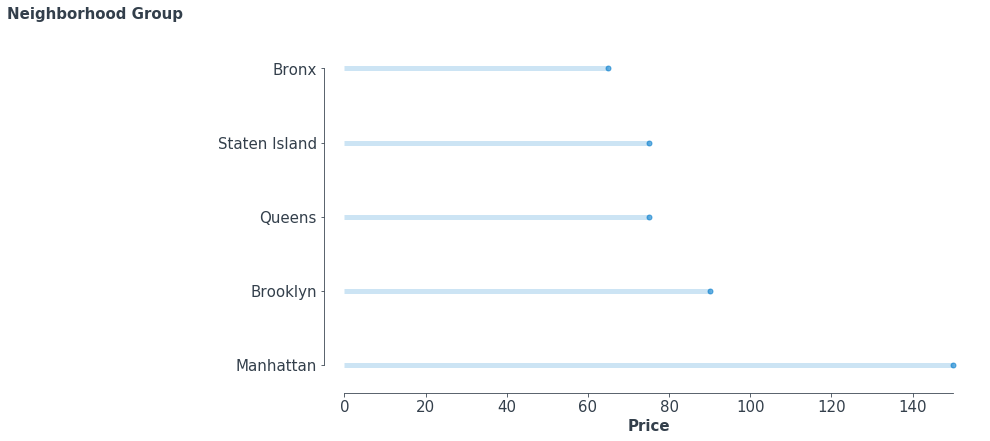

In [27]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
my_range=list(range(1,len(df_grp.index)+1))
fig, ax = plt.subplots(figsize=(12,6),facecolor='white');

# create for each neighborhood type an horizontal line that starts at x = 0 with the length 
# represented by the specific price  value.
plt.hlines(y=my_range, xmin=0, xmax=df_grp['price'], color='#007ACC', alpha=0.2, linewidth=5);

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df_grp['price'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6);

# set labels
ax.set_xlabel('Price', fontsize=15, fontweight='black', color = '#333F4B');
ax.set_ylabel('');

# set axis
ax.tick_params(axis='both', which='major', labelsize=15);
plt.yticks(my_range, df_grp.index);

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Neighborhood Group', fontsize=15, fontweight='black', color = '#333F4B');

# change the style of the axis spines
ax.spines['top'].set_color('none');
ax.spines['right'].set_color('none');
ax.spines['left'].set_smart_bounds(True);
ax.spines['bottom'].set_smart_bounds(True);

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04));
ax.spines['left'].set_position(('axes', 0.015));

plt.savefig('hist2.png', dpi=300, bbox_inches='tight');

 ### 2. Relationship between Price, Neighbourhood Group, and Room Type

In [28]:
df_room = df.groupby(by=['neighbourhood_group','room_type']).agg({'price':'median'}).reset_index()
pivot_df = df_room.pivot(index ='neighbourhood_group', columns='room_type', values='price')
pivot_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,100.0,53.5,40.0
Brooklyn,145.0,65.0,36.0
Manhattan,191.0,90.0,69.0
Queens,120.0,60.0,37.0
Staten Island,100.0,50.0,30.0


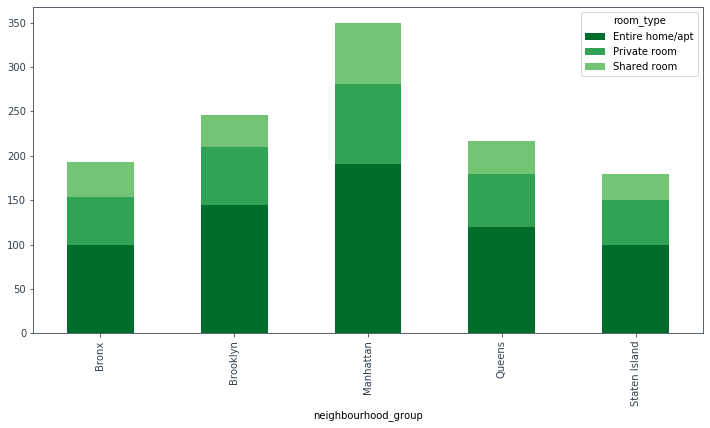

In [29]:
colors = ["#006D2C", "#31A354","#74C476"]
pivot_df.loc[:,['Entire home/apt','Private room', 'Shared room']].plot.bar(stacked=True, color=colors, figsize=(12,6));

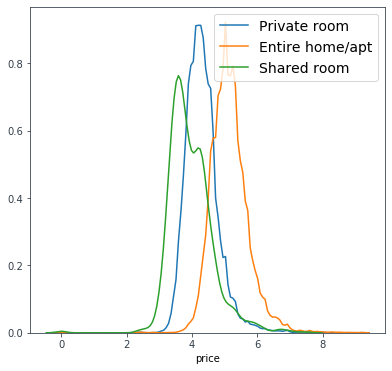

In [30]:
plt.figure(figsize=(14, 6))

plt.subplot(122)
for i in df['room_type'].unique():
    sns.distplot(np.log(df.loc[df['room_type'] == i]['price']+1), label = i, hist=False)
plt.legend(loc=0, fontsize=14);

### 3. Relationship between Neighbourhood Group and reviews per month

In [31]:
result = df.groupby(["neighbourhood_group"])['avg_reviews_per_month'].aggregate(np.median).reset_index()\
.sort_values('avg_reviews_per_month')
result = result.set_index('neighbourhood_group')
result.reset_index()

,neighbourhood_group,avg_reviews_per_month
0,Brooklyn,1.040000
1,Manhattan,1.160000
2,Staten Island,1.810000
3,Bronx,1.837831
4,Queens,1.880000


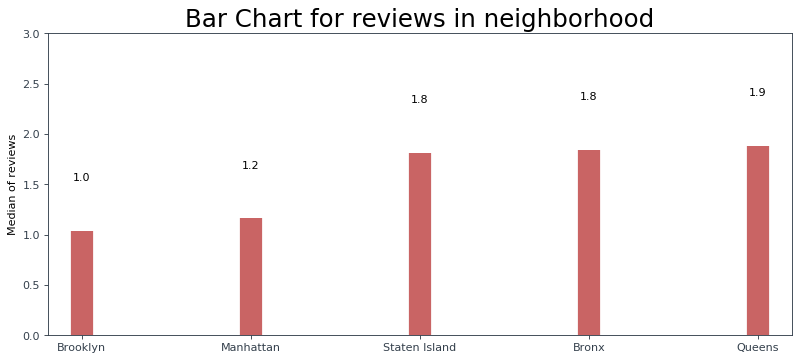

In [32]:
fig, ax = plt.subplots(figsize=(12,5), facecolor='white', dpi= 80)
ax.vlines(x=result.index, ymin=0, ymax=result.avg_reviews_per_month, color='firebrick', alpha=0.7, linewidth=20);

for i, avg_reviews_per_month in enumerate(result.avg_reviews_per_month):
    ax.text(i, avg_reviews_per_month +0.5, round(avg_reviews_per_month, 1), horizontalalignment='center');
     
# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for reviews in neighborhood', fontdict={'size':22});
ax.set(ylabel='Median of reviews', ylim=(0,3));
plt.show();

# Pre-processing Data for Machine Learning Models

## 1. Creating a copy of df called 'df_ml' which will be used for Machine Learning

In [33]:
df_ml = df.copy()

## 2. Convert following categorical values into numberic values:

## Neighbourhood group
1. Bronx: 1
2. Brooklyn: 2
3. Manhattan: 3
4. Queens: 4 
5. Staten Island: 5

In [34]:
neighbourhood_group_encoding = {'Bronx': 1, 'Brooklyn': 2, 'Manhattan': 3, 'Queens': 4, 'Staten Island': 5}
df_ml['neighbourhood_group'] = df_ml['neighbourhood_group'].map(neighbourhood_group_encoding)

## Room Type
1. Private room: 1
2. Entire home/apt: 2
3. Shared room: 3

In [35]:
room_type_encoding = {'Private room': 1, 'Entire home/apt': 2, 'Shared room': 3}
df_ml['room_type'] = df_ml['room_type'].map(room_type_encoding)

## Neighbourhood
Since neighbourhood has 221 different values, we will use label encoder from SKlearn preprocessing tools to convert these categorical values into numeric values

In [36]:
# creating LabelEncoder
le = preprocessing.LabelEncoder()
le.fit(df_ml['neighbourhood'])
df_ml['neighbourhood'] = le.transform(df_ml['neighbourhood'])

LabelEncoder()

## 3. Check data

In [37]:
df_ml.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,avg_reviews_per_month,calculated_host_listings_count,availability_365
0,2,108,40.64749,-73.97237,1,149,1,9,0.210000,6,365
1,3,127,40.75362,-73.98377,2,225,1,45,0.380000,2,355
2,3,94,40.80902,-73.94190,1,150,3,0,1.272131,1,365
3,2,41,40.68514,-73.95976,2,89,1,270,4.640000,1,194
4,3,61,40.79851,-73.94399,2,80,10,9,0.100000,1,0


# Feature Engineering:
 Exploring patterns in data to see if more data cleaning/data transformation is required

## 1. Data Correlation

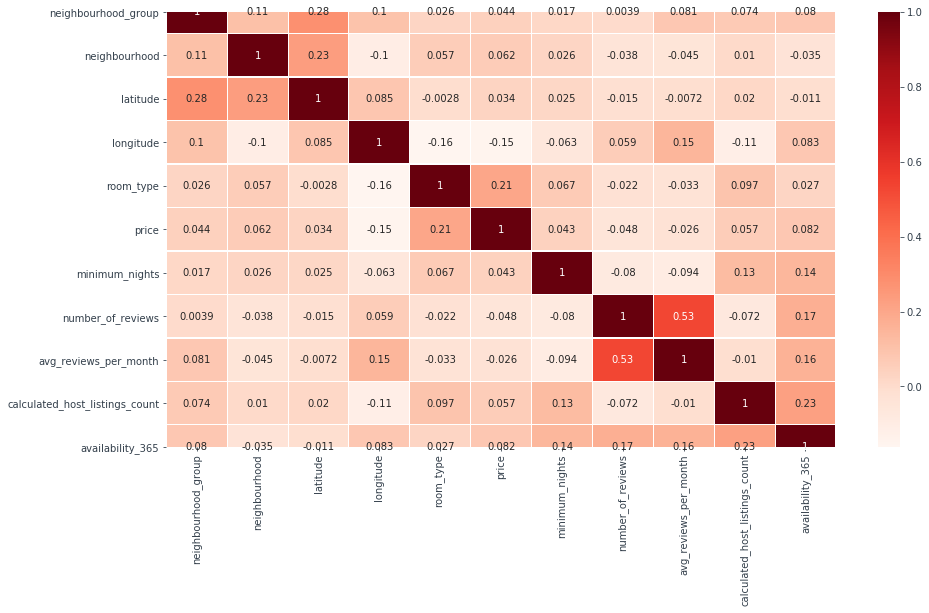

In [38]:
plt.figure(figsize=(15,8));
sns.heatmap(df_ml.corr(), annot=True, linewidths=0.1, cmap='Reds');

From the above graph, there is siginificant correlation between number of reviews & average number of reviews per month. Hence, we will keep only one column - "Average No. of Reviews per month". The number of people reviewing a host is taken into consideration in average number of reviews per month

## 2. Drop No. of Reviews column

In [39]:
df_ml.drop(['number_of_reviews'],axis=1,inplace=True)

## 3. Calculated Host Listings Count

In [40]:
df_ml.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

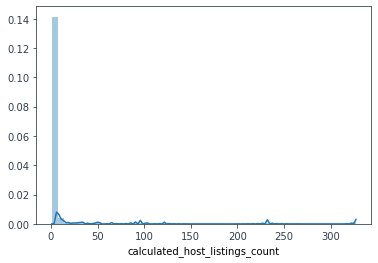

In [41]:
sns.distplot(df_ml['calculated_host_listings_count'])

In [42]:
print('The number of hosts with more than 10 listings: ',len(df_ml[df_ml['calculated_host_listings_count']>10]))

The number of hosts with more than 10 listings:  2967


Calculated host listings count column data is very skewed. To deal with this, we create two columns:
1. Normal Host: Hosts with less than 10 listings
2. Valued Host: Hosts with greater than 10 listings

### Creating 2 new columns "Normal Host" & "Valued Host" in place of calculated_host_listings_count

In [43]:
#Valued Host
df_ml['valued_host'] = df_ml['calculated_host_listings_count']>10
# Creates a column with values True/False. Converting categorical values into numerical values with label encoder
le.fit(df_ml['valued_host'])
df_ml['valued_host'] = le.transform(df_ml['valued_host'])

#Normal Host
df_ml['normal_host'] = df_ml['calculated_host_listings_count'].apply(lambda x: 10 if x>10 else x)

#Drop calculated_host_listings_count
df_ml.drop(['calculated_host_listings_count'],axis=1,inplace=True)

LabelEncoder()

## 4. Price

We check the price column characteristics. The price data is skewed from the graphs shown below. We remove rows with price = 0 and price > 3000 (unreasonable prices). To reduce the skew, we apply log1p to normalize the data

In [44]:
df_ml.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

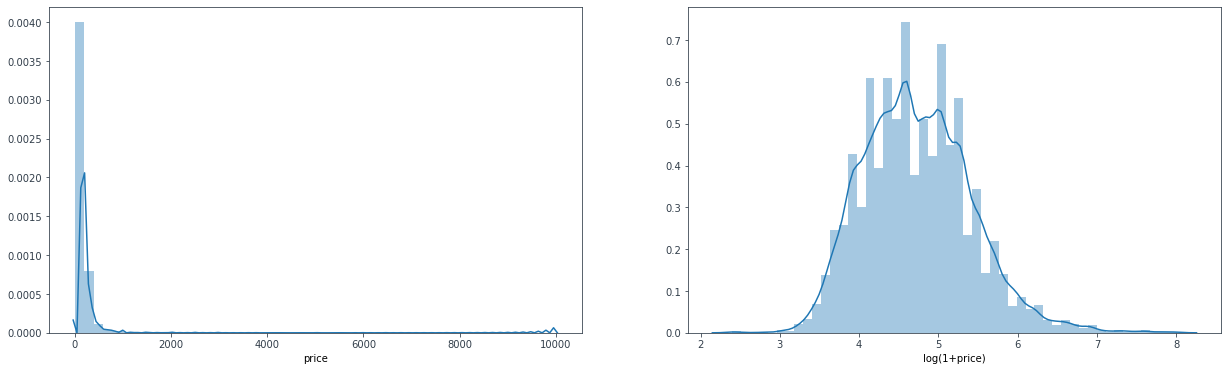

In [45]:
df_ml = df_ml[(df_ml['price']!=0)]
df_ml = df_ml[(df_ml['price']<=3000)]
df_ml['price'] = np.log1p(df_ml['price'])

fig, axes = plt.subplots(1,2, figsize=(21,6));
sns.distplot(df['price'], ax=axes[0]);
sns.distplot(df_ml['price'], ax=axes[1]);
axes[1].set_xlabel('log(1+price)');

In [46]:
df_ml.price.describe()

count    48839.000000
mean         4.734402
std          0.682064
min          2.397895
25%          4.248495
50%          4.663439
75%          5.170484
max          8.006701
Name: price, dtype: float64

## 5. Availability_365

Availability 365 column data is skewed. There are 17,000 rows with 0 availability. This could be because the airbnb's have been booked. Hence, we are not dropping these rows. We segregate availability_365 column into subcolumns such as no availability, low availability (upto 1 month), medium availability (1-6 months), and high availability (more than 6 months)

In [47]:
df_ml.availability_365.describe()

count    48839.000000
mean       112.701038
std        131.586999
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

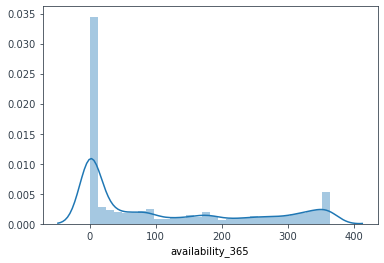

In [48]:
sns.distplot(df_ml['availability_365']);

In [49]:
#Create no availability
df_ml['no_availability'] = df_ml['availability_365'].apply(lambda x: 1 if x==0 else 0)
#Create low availability
df_ml['low_availability'] = df_ml['availability_365'].apply(lambda x: 1 if 1<=x<=30 else 0)
#Create medium availability
df_ml['medium_availability'] = df_ml['availability_365'].apply(lambda x: 1 if 31<=x<=183 else 0)
#Create high availability
df_ml['high_availability'] = df_ml['availability_365'].apply(lambda x: 1 if 184<=x<=365 else 0)
#Drop availability_365
df_ml.drop(['availability_365'],axis=1,inplace=True)

## 6. Minimum Nights

Minimum Nights is the minimum length of stay which cannot be more than 365 days in a year. Hence we have replaced by all values in minimum nights column greater than 365 with 365. This reduces the problem of outliers in the data as shown below.

In [50]:
df_ml.minimum_nights.describe()

count    48839.000000
mean         7.015807
std         20.484520
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

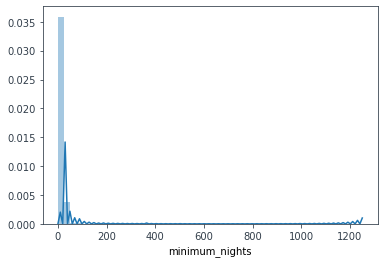

In [51]:
sns.distplot(df_ml['minimum_nights']);

In [52]:
df_ml['minimum_nights'] = df_ml['minimum_nights'].apply(lambda x: 365 if x>365 else x)

## Rearrange columns so that 'price' (target) is the last column

In [53]:
df_ml = df_ml[['neighbourhood_group','room_type','minimum_nights','avg_reviews_per_month','neighbourhood',
               'price']]

In [54]:
df_ml.head(1)

,neighbourhood_group,room_type,minimum_nights,avg_reviews_per_month,neighbourhood,price
0,2,1,1,0.21,108,5.010635


## Machine Learning Models

## Select Features & Target for building Machine Learning models

In [55]:
features = df_ml.iloc[:,:-1]
target = df_ml.iloc[:,-1]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=79)
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (39071, 5)
Dimensions of the training target vector: (39071,)
Dimensions of the test feature matrix: (9768, 5)
Dimensions of the test target vector: (9768,)


In [57]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## 1. PCA 

In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pca = decomposition.PCA(n_components=2)
X_centered = features - features.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [60]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            features.columns)))

1 component: 93.86% of initial variance
0.001 x neighbourhood_group + 0.000 x room_type + 0.008 x minimum_nights + -0.001 x avg_reviews_per_month + 1.000 x neighbourhood
2 component: 6.08% of initial variance
0.001 x neighbourhood_group + 0.002 x room_type + 1.000 x minimum_nights + -0.009 x avg_reviews_per_month + -0.008 x neighbourhood


## 2. Linear Regression

In [61]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_pred = linear_regressor.predict(X_test)

In [97]:
rmse_linear = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4337085959358162
Mean Squared Error: 0.3543730232979176
Root Mean Squared Error: 0.5952923847135267


In [65]:
metrics.r2_score(y_test,y_pred)

0.24886938379013068

## 3. Random Forest Regressor

In [69]:
gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5,  verbose=0,  n_jobs=-1)

In [70]:
grid_result = gsc.fit(X_train, y_train)

In [71]:
grid_result.best_params_

{'max_depth': 6, 'n_estimators': 1000}

In [72]:
best_params = grid_result.best_params_

In [73]:
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
# rfr = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=False, verbose=False)

In [74]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=False,
                      verbose=False, warm_start=False)

In [75]:
ypred=rfr.predict(X_test)

In [98]:
rmse_randomforest = np.sqrt(metrics.mean_squared_error(y_test, ypred))

In [76]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

Mean Absolute Error: 0.3500552207787493
Mean Squared Error: 0.2287302815286308
Root Mean Squared Error: 0.47825754727827435


## 4. Gradient Boosting

In [78]:
gb = GradientBoostingRegressor()
parameters = {
    'max_depth' : [5,7],
    'n_estimators' : [250,500],
    'learning_rate' : [0.01,0.1]
}

gridCV = GridSearchCV(gb, parameters, cv=5)
gridFit = gridCV.fit(X_train, y_train)

In [79]:
gridFit.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}

In [81]:
# Test-train split and apply PCA
gb = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 5, n_estimators= 250)
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [82]:
gb.score(X_train, y_train)

0.5911808831044347

In [83]:
prediction = gb.predict(X_test)

In [84]:
rmse_gb = np.sqrt(mean_squared_error(y_test, prediction))
rmse_gb

0.45492003661530905

## 5. XG Boosting

In [87]:
data_dmatrix = xgb.DMatrix(data=features,label=target)

In [88]:
xgb.cv

<function xgboost.training.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), obj=None, feval=None, maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True, verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)>

In [89]:
xgb_reg_start = time.time()
xgb_reg = xgb.XGBRegressor()

params = {"objective":"reg:squarederror",
          'colsample_bytree':0.7,
          'learning_rate':0.01,
          'max_depth':10,
          'n_estimators':1000,
          'alpha': 90}

xgb.train(params=params,dtrain= data_dmatrix, num_boost_round=10)
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nValidation RMSE:", round(np.sqrt(mean_squared_error(y_test, val_preds_xgb_reg)),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[21:57:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Time taken to run: 0.0 minutes

Training MSE: 0.2173
Validation MSE: 0.2196

Validation RMSE: 0.4686

Training r2: 0.5312
Validation r2: 0.5346


In [90]:
rmse_xgboosting = round(np.sqrt(mean_squared_error(y_test, val_preds_xgb_reg)),4)

In [91]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': val_preds_xgb_reg.flatten()}).head(20)

error_airbnb.head(5)

,Actual Values,Predicted Values
0,5.525453,5.029971
1,4.110874,4.250494
2,4.025352,4.273315
3,5.707110,5.333302
4,4.189655,4.165104


## Sort & Display model performance based on the RMSE values

In [106]:
data = {'Model':['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting', 'XG Boosting'], 
        'RMSE Value':[rmse_linear, rmse_randomforest, rmse_gb, rmse_xgboosting]}
df_rmse_scores = pd.DataFrame(data)
df_rmse_scores.sort_values('RMSE Value', inplace=True, ascending = True)
df_rmse_scores.reset_index(drop=True)

,Model,RMSE Value
0,Gradient Boosting,0.454920
1,XG Boosting,0.468600
2,Random Forest Regressor,0.478258
3,Linear Regression,0.595292


Airbnb pricing is very important factor in cities like New York where there is huge competition. We would like to address the following problems:
1. Explore data to find key insights/trends in airbnb rental price which can help hosts to maximize earnings & allow guests to find the perfect airbnb based on neighbourhood.
2. Leverage machine learning to predict the price for properties in New York.

## Conclusion:

1. <b>RMSE values</b>: Since Airbnb data is very skewed (as observed from feature engineering and exploratory data analysis), there was no significant change in RMSE values with hyper parameter tuning.

2. Of all the models implemented, Gradient Boosting & XG Boosting seem to be giving better results.

3. Before feature engineering, the baseline RMSE values were very discouraging (~200). We have achieved a significant improvement in RMSE values for all the models through comprehensive feature engineering performed on each column.

4. Further, the use of Principal Component Analysis helped us to reduce the dimensionality of this vast Airbnb data. The results of Principal Component Analysis indicate that, 99% of the data can be described through two to three features. 

5. <b>Neighbourhood & Minimum nights</b> have maximum influence of the Airbnb Price.

6. <b>Exploratory Data Analysis Results</b>: From EDA, we can infer the following:
    * Airbnb's located in Manhattan are the most expensive, followed by "Brooklyn" & "Staten Island"
    * Airbnb's classified as "Entire Home/Apt" are most expensive, followed by "Private Room" and "Shared Room"
    * Airbnb's located in Queens are more popular among guests & have more number of reviews

## Future Work:
1. Scrape the latest New York Airbnb Data, add it to the data above and perform hyper paramater tuning to improve the model estimation capacity.
2. Explore a deep learning/neural network approach such as RNN/LSTM to predict prices.
3. Explore Sentiment Analysis to gain insights from Airbnb guest reviews & update machine models to take into consideration key insights learnt from sentiment analysis to predict prices.

## References:
1. https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
2. http://insideairbnb.com/get-the-data.html